# 유튜브 조회수 상승을 위한 제목 및 썸네일 추천 서비스

- 제목 기반
- 썸네일 기반

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/썸네일플젝/final_data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df = data.dropna(axis=0)

## 전처리

### 1) 데이터 중복 제거, 구독자 비공개 제공, count오류 제거

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df #54926 rows

In [ ]:
index = df[df['subscriber'].str.contains('비공개')].index
df.drop(index, inplace = True)
df.reset_index(drop=True, inplace=True)
df

In [ ]:
index = df[df['viewCount']==-1].index
df.drop(index, inplace = True)
df.reset_index(drop=True, inplace=True)
df  #54454 rows

### 2) date diff 계산

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.to_period(freq='D')
df['date'] = df['date'].values.astype('datetime64[D]')

In [ ]:
import datetime
day = datetime.datetime(2022,5,22)
df['date_diff'] = day - df['date']

In [ ]:
df['date_diff']=df['date_diff'].apply(str)
df['date_diff'] = df['date_diff'].str.strip(" days 00:00:00")

In [ ]:
df

,channel_name,title,date,thumbnail,videoId,URL,viewCount,likeCount,commentCount,subscriber,category,date_diff
0,피지컬갤러리,전직 UDT. 특수부대 학원에 가다! (숨참기 8분 30초 ㄷㄷ...?) | 달려라...,2019-11-23,https://i.ytimg.com/vi/tV1Dc-LCZJw/hqdefault.jpg,tV1Dc-LCZJw,https://www.youtube.com/watch?v=tV1Dc-LCZJw,11610712,62590.0,5187.0,3070000,스포츠_운동,911
1,피지컬갤러리,110만 유튜버 해외여행 클라스.. ㄷㄷ,2019-11-04,https://i.ytimg.com/vi/bPCriDPI4Oc/hqdefault.jpg,bPCriDPI4Oc,https://www.youtube.com/watch?v=bPCriDPI4Oc,8770917,54094.0,7249.0,3070000,스포츠_운동,93
2,피지컬갤러리,푸쉬업 &#39;이렇게&#39; 제발 하지마세요 (팔꿈치 박살),2019-01-20,https://i.ytimg.com/vi/DMU6bat46SM/hqdefault.jpg,DMU6bat46SM,https://www.youtube.com/watch?v=DMU6bat46SM,6101839,65041.0,3316.0,3070000,스포츠_운동,1218
3,피지컬갤러리,북한 잠수함에 권총 한 자루를 들고간 UDT 작전 실화 (with 유병호 준위),2019-09-02,https://i.ytimg.com/vi/jXDlTaxnp6E/hqdefault.jpg,jXDlTaxnp6E,https://www.youtube.com/watch?v=jXDlTaxnp6E,5924894,59601.0,6539.0,3070000,스포츠_운동,993
4,피지컬갤러리,UDT vs 프로 파이터들 (달려라 김계란 Ep2 팀매드 체육관 인턴 1부),2019-09-28,https://i.ytimg.com/vi/lmJSbxXyom0/hqdefault.jpg,lmJSbxXyom0,https://www.youtube.com/watch?v=lmJSbxXyom0,5774965,39466.0,4191.0,3070000,스포츠_운동,967
...,...,...,...,...,...,...,...,...,...,...,...,...
54449,서울리안 SEOULiAN,엡손 프린터 L3156 | 집에 프린터는 하나는 꼭 필요하더라구요.,2019-07-03,https://i.ytimg.com/vi/5KufhSz3RKM/hqdefault.jpg,5KufhSz3RKM,https://www.youtube.com/watch?v=5KufhSz3RKM,57906,455.0,126.0,220000,IT_컴퓨터,1054
54450,서울리안 SEOULiAN,삼성 T7 &amp; T7 Touch | 이제 외장 SSD도 지문으로 잠금해제~,2020-07-05,https://i.ytimg.com/vi/KsjQUDocilE/hqdefault.jpg,KsjQUDocilE,https://www.youtube.com/watch?v=KsjQUDocilE,57215,750.0,194.0,220000,IT_컴퓨터,686
54451,서울리안 SEOULiAN,주행요금 0원! 이제 약속장소까지 전기차로 갑니다 (SOCAR),2020-12-03,https://i.ytimg.com/vi/7S6OFrkL2YI/hqdefault.jpg,7S6OFrkL2YI,https://www.youtube.com/watch?v=7S6OFrkL2YI,56736,753.0,111.0,220000,IT_컴퓨터,535
54452,서울리안 SEOULiAN,2018 New MacBook Pro | 디자인 빼고 다 바꼈어요!! (아 올해는 ...,2018-07-14,https://i.ytimg.com/vi/ou_BjRgDsYE/hqdefault.jpg,ou_BjRgDsYE,https://www.youtube.com/watch?v=ou_BjRgDsYE,56594,730.0,216.0,220000,IT_컴퓨터,1408


### 3) 제목 텍스트 처리
- html 태그 -> 인코딩/디코딩
- 특수문자 개수, 품사표 기준 개수, 이모지 -> 단어

In [ ]:
def html_decode(s):
    """
    Returns the ASCII decoded version of the given HTML string. This does
    NOT remove normal HTML tags like <p>.
    """
    htmlCodes = (
            ("'", '&#39;'),
            ('"', '&quot;'),
            ('>', '&gt;'),
            ('<', '&lt;'),
            ('&', '&amp;')
        )
    for code in htmlCodes:
        s = s.replace(code[1], code[0])
    return s


In [ ]:
unescaped = html_decode(df['title'])

In [ ]:
df['title'] = df['title'].str.replace('&#39;',"'")
df['title'] = df['title'].str.replace('&quot;','"')
df['title'] = df['title'].str.replace('&gt;',">")
df['title'] = df['title'].str.replace('&lt;',"<")
df['title'] = df['title'].str.replace('&amp;',"&")

In [ ]:
df['title_symbol'] = df['title']

In [ ]:
import re

#기호 특수문자 남기기
def alpha_num(text):
    return re.sub('[ㄱ-ㅎㅏ-ㅣ가-힣,A-z,\d,\s]', '', text)

In [ ]:
df['title_symbol']=df['title_symbol'].apply(alpha_num)
df['title_symbol']=df['title_symbol'].apply(len)

In [ ]:
df

,channel_name,title,date,thumbnail,videoId,URL,viewCount,likeCount,commentCount,subscriber,category,date_diff,title_symbol
0,피지컬갤러리,전직 UDT. 특수부대 학원에 가다! (숨참기 8분 30초 ㄷㄷ...?) | 달려라...,2019-11-23,https://i.ytimg.com/vi/tV1Dc-LCZJw/hqdefault.jpg,tV1Dc-LCZJw,https://www.youtube.com/watch?v=tV1Dc-LCZJw,11610712,62590.0,5187.0,3070000,스포츠_운동,911,9
1,피지컬갤러리,110만 유튜버 해외여행 클라스.. ㄷㄷ,2019-11-04,https://i.ytimg.com/vi/bPCriDPI4Oc/hqdefault.jpg,bPCriDPI4Oc,https://www.youtube.com/watch?v=bPCriDPI4Oc,8770917,54094.0,7249.0,3070000,스포츠_운동,93,2
2,피지컬갤러리,푸쉬업 '이렇게' 제발 하지마세요 (팔꿈치 박살),2019-01-20,https://i.ytimg.com/vi/DMU6bat46SM/hqdefault.jpg,DMU6bat46SM,https://www.youtube.com/watch?v=DMU6bat46SM,6101839,65041.0,3316.0,3070000,스포츠_운동,1218,4
3,피지컬갤러리,북한 잠수함에 권총 한 자루를 들고간 UDT 작전 실화 (with 유병호 준위),2019-09-02,https://i.ytimg.com/vi/jXDlTaxnp6E/hqdefault.jpg,jXDlTaxnp6E,https://www.youtube.com/watch?v=jXDlTaxnp6E,5924894,59601.0,6539.0,3070000,스포츠_운동,993,2
4,피지컬갤러리,UDT vs 프로 파이터들 (달려라 김계란 Ep2 팀매드 체육관 인턴 1부),2019-09-28,https://i.ytimg.com/vi/lmJSbxXyom0/hqdefault.jpg,lmJSbxXyom0,https://www.youtube.com/watch?v=lmJSbxXyom0,5774965,39466.0,4191.0,3070000,스포츠_운동,967,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54449,서울리안 SEOULiAN,엡손 프린터 L3156 | 집에 프린터는 하나는 꼭 필요하더라구요.,2019-07-03,https://i.ytimg.com/vi/5KufhSz3RKM/hqdefault.jpg,5KufhSz3RKM,https://www.youtube.com/watch?v=5KufhSz3RKM,57906,455.0,126.0,220000,IT_컴퓨터,1054,2
54450,서울리안 SEOULiAN,삼성 T7 & T7 Touch | 이제 외장 SSD도 지문으로 잠금해제~,2020-07-05,https://i.ytimg.com/vi/KsjQUDocilE/hqdefault.jpg,KsjQUDocilE,https://www.youtube.com/watch?v=KsjQUDocilE,57215,750.0,194.0,220000,IT_컴퓨터,686,3
54451,서울리안 SEOULiAN,주행요금 0원! 이제 약속장소까지 전기차로 갑니다 (SOCAR),2020-12-03,https://i.ytimg.com/vi/7S6OFrkL2YI/hqdefault.jpg,7S6OFrkL2YI,https://www.youtube.com/watch?v=7S6OFrkL2YI,56736,753.0,111.0,220000,IT_컴퓨터,535,3
54452,서울리안 SEOULiAN,2018 New MacBook Pro | 디자인 빼고 다 바꼈어요!! (아 올해는 ...,2018-07-14,https://i.ytimg.com/vi/ou_BjRgDsYE/hqdefault.jpg,ou_BjRgDsYE,https://www.youtube.com/watch?v=ou_BjRgDsYE,56594,730.0,216.0,220000,IT_컴퓨터,1408,8


In [ ]:
!pip install konlpy
!sudo apt-get install curl git
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [ ]:
#부호를 제거해주는 함수 > 한글, 영어, 숫자, 한자, 공백만 남김
def alpha_num(text):
    return re.sub(r'[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9一-龥 ]', '', text)

In [ ]:
df['noun'] = df['title']

In [ ]:
df['noun']=df['noun'].apply(alpha_num)

In [ ]:
from konlpy.tag import Okt
from collections import Counter

In [ ]:
okt = Okt

for i in range(len(df['noun'])) : 
  df['noun'][i] =  len(okt().nouns(df['noun'][i]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df

### 4) 제목 처리

In [ ]:
!pip install emoji
import emoji

In [ ]:
punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "",
                 "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2",
                 "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"',
                 '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta',
                 '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-',
                 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', '│':'|', 'ㅣ':'|'} #replace
specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}

punct1 = "/-'.,#$\'()*+-/:;<=>@[\\]^_`{|}~%" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&' #remove
punct2 = "!?|" #add space
punct3 = 'ㅋㅠㅎㅜ' #regulate ㅋㅋㅋㅋ, ㅎㅎㅎㅎ,, etc

def clean_punc(text):
    for p in punct_mapping:  #replace
        text = text.replace(p, punct_mapping[p])
    for p in punct1:   #remove
        text = text.replace(p, f' ')
    for p in punct2:   #add space
        text = text.replace(p, f' {p} ')

    for s in specials:
        text = text.replace(s, specials[s])
    
    text = emoji.demojize(text) #change emoticon to :string:
    text = re.sub(r':(\D*)(\d*)(\D*):', r' :\1\2\3: ', text)

    #regulate ㅋㅋㅋㅋ, ㅎㅎㅎㅎ,, etc
    for t in punct3:
        text = re.sub(r'['+t+']+', ' '+t*4+' ', text)
    
    return text.strip()

In [ ]:
data_clean_punc = []
for title in df['title']:
    data_clean_punc.append(clean_punc(title))

In [ ]:
def clean_text(texts):
    corpus = []
    for i in range(0, len(texts)):
        
        review = str(texts[i])
        review = review.lower() #lower case
        review = re.sub(r'\s+', ' ', review) #remove extra space
        
        review = re.sub(r'\s+', ' ', review) #remove spaces
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end

        corpus.append(review)
        
    return corpus

In [ ]:
data_clean_text = clean_text(data_clean_punc)

In [ ]:
df['preprocessed_title'] = df['title']

In [ ]:
df['preprocessed_title'] = data_clean_text

In [ ]:
df

,channel_name,title,date,thumbnail,videoId,URL,viewCount,likeCount,commentCount,subscriber,category,date_diff,title_symbol,noun,preprocessed_title
0,피지컬갤러리,전직 UDT. 특수부대 학원에 가다! (숨참기 8분 30초 ㄷㄷ...?) | 달려라...,2019-11-23,https://i.ytimg.com/vi/tV1Dc-LCZJw/hqdefault.jpg,tV1Dc-LCZJw,https://www.youtube.com/watch?v=tV1Dc-LCZJw,11610712,62590.0,5187.0,3070000,스포츠_운동,911,9,7,전직 udt 특수부대 학원에 가다 ! 숨참기 8분 30초 ㄷㄷ ? 달려라 김계란 e...
1,피지컬갤러리,110만 유튜버 해외여행 클라스.. ㄷㄷ,2019-11-04,https://i.ytimg.com/vi/bPCriDPI4Oc/hqdefault.jpg,bPCriDPI4Oc,https://www.youtube.com/watch?v=bPCriDPI4Oc,8770917,54094.0,7249.0,3070000,스포츠_운동,93,2,3,110만 유튜버 해외여행 클라스 ㄷㄷ
2,피지컬갤러리,푸쉬업 '이렇게' 제발 하지마세요 (팔꿈치 박살),2019-01-20,https://i.ytimg.com/vi/DMU6bat46SM/hqdefault.jpg,DMU6bat46SM,https://www.youtube.com/watch?v=DMU6bat46SM,6101839,65041.0,3316.0,3070000,스포츠_운동,1218,4,4,푸쉬업 이렇게 제발 하지마세요 팔꿈치 박살
3,피지컬갤러리,북한 잠수함에 권총 한 자루를 들고간 UDT 작전 실화 (with 유병호 준위),2019-09-02,https://i.ytimg.com/vi/jXDlTaxnp6E/hqdefault.jpg,jXDlTaxnp6E,https://www.youtube.com/watch?v=jXDlTaxnp6E,5924894,59601.0,6539.0,3070000,스포츠_운동,993,2,9,북한 잠수함에 권총 한 자루를 들고간 udt 작전 실화 with 유병호 준위
4,피지컬갤러리,UDT vs 프로 파이터들 (달려라 김계란 Ep2 팀매드 체육관 인턴 1부),2019-09-28,https://i.ytimg.com/vi/lmJSbxXyom0/hqdefault.jpg,lmJSbxXyom0,https://www.youtube.com/watch?v=lmJSbxXyom0,5774965,39466.0,4191.0,3070000,스포츠_운동,967,2,9,udt vs 프로 파이터들 달려라 김계란 ep2 팀매드 체육관 인턴 1부
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54449,서울리안 SEOULiAN,엡손 프린터 L3156 | 집에 프린터는 하나는 꼭 필요하더라구요.,2019-07-03,https://i.ytimg.com/vi/5KufhSz3RKM/hqdefault.jpg,5KufhSz3RKM,https://www.youtube.com/watch?v=5KufhSz3RKM,57906,455.0,126.0,220000,IT_컴퓨터,1054,2,6,엡손 프린터 l3156 집에 프린터는 하나는 꼭 필요하더라구요
54450,서울리안 SEOULiAN,삼성 T7 & T7 Touch | 이제 외장 SSD도 지문으로 잠금해제~,2020-07-05,https://i.ytimg.com/vi/KsjQUDocilE/hqdefault.jpg,KsjQUDocilE,https://www.youtube.com/watch?v=KsjQUDocilE,57215,750.0,194.0,220000,IT_컴퓨터,686,3,6,삼성 t7 t7 touch 이제 외장 ssd도 지문으로 잠금해제
54451,서울리안 SEOULiAN,주행요금 0원! 이제 약속장소까지 전기차로 갑니다 (SOCAR),2020-12-03,https://i.ytimg.com/vi/7S6OFrkL2YI/hqdefault.jpg,7S6OFrkL2YI,https://www.youtube.com/watch?v=7S6OFrkL2YI,56736,753.0,111.0,220000,IT_컴퓨터,535,3,5,주행요금 0원 ! 이제 약속장소까지 전기차로 갑니다 socar
54452,서울리안 SEOULiAN,2018 New MacBook Pro | 디자인 빼고 다 바꼈어요!! (아 올해는 ...,2018-07-14,https://i.ytimg.com/vi/ou_BjRgDsYE/hqdefault.jpg,ou_BjRgDsYE,https://www.youtube.com/watch?v=ou_BjRgDsYE,56594,730.0,216.0,220000,IT_컴퓨터,1408,8,3,2018 new macbook pro 디자인 빼고 다 바꼈어요 ! ! 아 올해는 바...


- 조회수 구간별로 나누기
- 

In [ ]:
df['views_bin'] = (df['viewCount'].floordiv(1000)) 

# 1M 이후부터는 1,000,000 단위로 조회수 잘라야 할 것 같음 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['views_bin'] = df['views_bin'].astype('int64') # 데이터 int 타입으로 바꿔주기

In [ ]:
df['views_bin'].describe() 

count     54454.000000
mean        544.423440
std        1864.799649
min           0.000000
25%          43.000000
50%         159.000000
75%         519.000000
max      160415.000000
Name: views_bin, dtype: float64

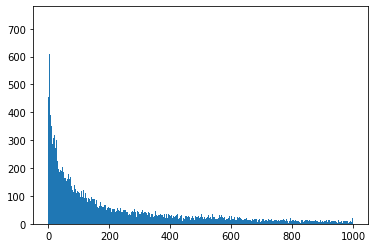

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['views_bin'], range(0,1000))
plt.show()

In [ ]:
import math # 구간 나눠주기 -> multiclass classification

for index, view in enumerate(df['views_bin']):
  if view >=700:  df['views_bin'][index] =  700
  elif view >=250:  df['views_bin'][index] = 250
  elif view >=100: df['views_bin'][index] = 100
  elif view >=30: df['views_bin'][index] = 30
  elif view <30: df['views_bin'][index] = 1

- 0이상 ~ 3만 미만: 1
- 3만 이상 10만 미만 : 30
- 10만 이상 25만 미만 : 100
- 25만 이상 70만 미만 : 250
- 70만 이상 : 700


In [ ]:
label = Counter(df['views_bin']).keys()
label = sorted(label)
label

[1, 30, 100, 250, 700]

In [ ]:
df['views_bin'].value_counts()

250    11942
1      10933
30     10793
100    10608
700    10178
Name: views_bin, dtype: int64

In [ ]:
key = list(range(len(label)))

In [ ]:
# 구간 -> 인덱스, 인덱스 -> 구간 저장한 딕셔너리
cat_to_id = dict(zip(label, key))
id_to_cat = dict(zip(key, label))

In [ ]:
df.to_csv("/content/drive/MyDrive/썸네일플젝/전처리_data.csv")

## 1) 제목 기반

In [ ]:
# 자연어처리 
from konlpy.tag import *
from gensim.models import Word2Vec, FastText
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

# LSTM 
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, Dense, LSTM, GRU, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

In [ ]:
##data = pd.read_csv('../data/data_including_subscriber_and_thumbnail.csv', usecols = [5,6], encoding='UTF-8')
##data.head()

### Tokenize 

In [ ]:
# 형태소 분석 대호 tokenizing
def make_corpus_morph(text):
    corpus = []
    for s in text:
        corpus.append([p[0] for p in okt().pos(s)])
    return corpus

In [ ]:
corpus = make_corpus_morph(df['preprocessed_title'])
corpus[:3]

In [ ]:
data_cat['tokenized'] = corpus
data_cat.head()

,views,preprocessed_title,tokenized
0,10000,전직 udt 특수부대 학원에 가다 ! 숨참기 8분 30초 ㄷㄷ ? 달려라 김계란 e...,"[전직, udt, 특수부대, 학원, 에, 가다, !, 숨, 참기, 8분, 30초, ..."
1,1000,110만 유튜버 해외여행 클라스 ㄷㄷ,"[110만, 유튜버, 해외여행, 클라스, ㄷㄷ]"
2,1000,푸쉬업 이렇게 제발 하지마세요 팔꿈치 박살,"[푸쉬업, 이렇게, 제발, 하지, 마세요, 팔꿈치, 박살]"
3,1000,북한 잠수함에 권총 한 자루를 들고간 udt 작전 실화 with 유병호 준위,"[북한, 잠수함, 에, 권총, 한, 자루, 를, 들, 고간, udt, 작전, 실화,..."
4,1000,udt vs 프로 파이터들 달려라 김계란 ep2 팀매드 체육관 인턴 1부,"[udt, vs, 프로, 파이터, 들, 달려라, 김, 계란, ep, 2, 팀, 매드..."


### X,Y, test/train split

In [ ]:
X = data_cat['tokenized']
y = data_cat['views']

In [ ]:
cat_to_id

{0: 0, 1: 1, 10: 2, 100: 3, 1000: 4, 10000: 5}

In [ ]:
# 조회수 구간 라벨 값으로 대체

views = data_cat['views'].map(cat_to_id)
data_cat['views'] = views
data_cat.head()

,views,preprocessed_title,tokenized
0,5,전직 udt 특수부대 학원에 가다 ! 숨참기 8분 30초 ㄷㄷ ? 달려라 김계란 e...,"[전직, udt, 특수부대, 학원, 에, 가다, !, 숨, 참기, 8분, 30초, ..."
1,4,110만 유튜버 해외여행 클라스 ㄷㄷ,"[110만, 유튜버, 해외여행, 클라스, ㄷㄷ]"
2,4,푸쉬업 이렇게 제발 하지마세요 팔꿈치 박살,"[푸쉬업, 이렇게, 제발, 하지, 마세요, 팔꿈치, 박살]"
3,4,북한 잠수함에 권총 한 자루를 들고간 udt 작전 실화 with 유병호 준위,"[북한, 잠수함, 에, 권총, 한, 자루, 를, 들, 고간, udt, 작전, 실화,..."
4,4,udt vs 프로 파이터들 달려라 김계란 ep2 팀매드 체육관 인턴 1부,"[udt, vs, 프로, 파이터, 들, 달려라, 김, 계란, ep, 2, 팀, 매드..."


In [ ]:
y = to_categorical(y) # one hot encoding
y[:3]

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Embeding

In [ ]:
## from transformers import BertTokenizer
## tokenizer = BertTokenizer.from_pretrained("bert-base-uncased") # Bert-base의 토크나이저

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
# 각 단어의 고유한 정수 출력
print(tokenizer.word_index) # 정수 클수록 등장 빈도수 낮음

{'!': 1, '?': 2, '의': 3, '이': 4, ':': 5, '을': 6, '에': 7, '가': 8, '_': 9, '를': 10, '들': 11, '는': 12, '은': 13, '1': 14, '한': 15, '2': 16, '하는': 17, '고양이': 18, '부동산': 19, '3': 20, 'tv': 21, '과': 22, '로': 23, '투자': 24, '에서': 25, '강아지': 26, '으로': 27, '주식': 28, '와': 29, '이유': 30, '4': 31, '방법': 32, '도': 33, '방송': 34, '영어': 35, '뉴스': 36, '수': 37, 'vs': 38, '...': 39, 'ㅋㅋㅋㅋ': 40, '5': 41, '부': 42, '법': 43, '대': 44, '것': 45, '만': 46, '영상': 47, '할': 48, '안': 49, 'kbs': 50, '때': 51, '말': 52, '편': 53, '적': 54, '까지': 55, '에게': 56, 'feat': 57, '다': 58, '가지': 59, '요': 60, '집': 61, '인': 62, '한국': 63, '전': 64, 'live': 65, 'a': 66, 'ep': 67, 'sbs': 68, '나': 69, '고': 70, '위': 71, '2022': 72, '왜': 73, '개': 74, '일': 75, '사람': 76, '·': 77, '내': 78, '장': 79, '10': 80, '꼭': 81, '운동': 82, '중': 83, '요가': 84, '삼성': 85, 's': 86, '시': 87, '화': 88, '영': 89, '7': 90, '풀': 91, '아': 92, '프로': 93, '하기': 94, '제': 95, '못': 96, '라이브': 97, '세': 98, 'face': 99, '진짜': 100, '공개': 101, '공부': 102, '급': 103, 'x': 104, '잘': 105, 

In [ ]:
threshold = 2                         
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0                          # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0                        # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0                         # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 45755
등장 빈도가 1번 이하인 희귀 단어의 수: 18807
단어 집합에서 희귀 단어의 비율: 41.10370451316796
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.9068185892957605


In [ ]:
# 전체 단어 개수 중 빈도수 1이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 26949


In [ ]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)

# keras tokenizer -> 텍스트 시퀀스 숫자 시퀀스로 변환
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

제목의 최대 길이 : 64
제목의 평균 길이 : 14.420241948442486


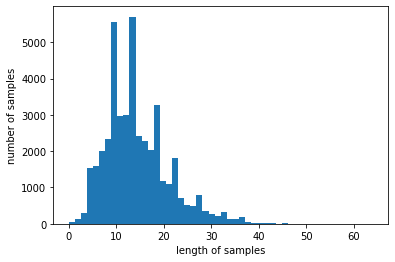

In [ ]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

print('제목의 최대 길이 :',max(len(l) for l in X_train))
print('제목의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 97.24307325023528


In [ ]:
# 모든 샘플의 길이 30으로 맞추기
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
X_train

array([[    0,     0,     0, ...,    13,   651,   790],
       [    0,     0,     0, ..., 15031, 18667,     1],
       [    0,     0,     0, ...,     9,  4388,     5],
       ...,
       [    0,     0,     0, ...,   107,   102,   582],
       [    0,     0,     0, ...,  1296,   684, 11018],
       [    0,     0,     0, ...,  1424,   285,  7371]], dtype=int32)

### LSTM

In [ ]:
# Bi-Directional LSTM
model2 = Sequential([
    Embedding(vocab_size, 64),
    Bidirectional(LSTM(128, dropout = 0.2)),
    Dense(64, activation='relu'),
    Dense(6,activation='softmax')
])

print(model2.summary())

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('Bi-LSTM_class6.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model2.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['acc'])
history = model2.fit(X_train, y_train, epochs=20, callbacks=[es, mc], batch_size=64, validation_data=(X_test, y_test))

In [ ]:
loaded_model = load_model('Bi-LSTM_class6.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

In [ ]:
pred = np.argmax(loaded_model.predict(X_test), axis=-1)

In [ ]:
true = [np.argmax(y_test[i]) for i in range(len(y_test))]

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_mat=confusion_matrix(true, pred)  # confusion matrix 계산

# Class 별 Accuracy
class_accuracy=100*conf_mat.diagonal()/conf_mat.sum(1)  # 각 클래스 별 accuracy 담은 list
class_accuracy = pd.DataFrame(class_accuracy, columns = ['Accuracy']) # dataframe 화하기

In [ ]:
class_accuracy.insert(0, 'View Category', list(cat_to_id.keys())[:20])
class_accuracy